In [3]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [4]:
dataset = MNIST(root="/", download=True)

Extracting /MNIST\raw\train-images-idx3-ubyte.gz to /MNIST\raw


Extracting /MNIST\raw\train-labels-idx1-ubyte.gz to /MNIST\raw


Extracting /MNIST\raw\t10k-images-idx3-ubyte.gz to /MNIST\raw


Extracting /MNIST\raw\t10k-labels-idx1-ubyte.gz to /MNIST\raw
Processing...


C:\Users\msris\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [5]:
len(dataset)

60000

In [9]:
import matplotlib as mlp
import matplotlib.pyplot as plt

In [17]:
image, label = dataset[0]

Label: 5


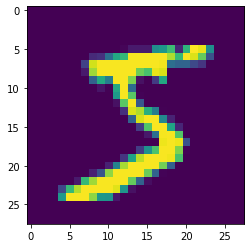

In [20]:
print("Label: " + str(label))
plt.imshow(image)

In [21]:
import torchvision.transforms as transforms 

In [22]:
dataset = MNIST(root="/",
                train=True,
               transform=transforms.ToTensor())

In [23]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [30]:
import numpy as np

def split_indices(n, val_pct):
    n_val = int(val_pct * n)
    idxs = np.random.permutation(n)
    return idxs[n_val: ], idxs[:n_val]

In [31]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.15)

In [33]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn

batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                         batch_size,
                         sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                         batch_size,
                         sampler=val_sampler)

In [45]:
class MNIST_model(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 28*28)
        out = self.linear(xb)
        return out

model = MNIST_model(784, 10)

In [48]:
# model.linear.weight.shape
# model.linear.bias.shape
list(model.parameters())

[Parameter containing:
 tensor([[-0.0128,  0.0101, -0.0325,  ..., -0.0024, -0.0122,  0.0223],
         [ 0.0133,  0.0343, -0.0255,  ..., -0.0236,  0.0013,  0.0028],
         [ 0.0278, -0.0287,  0.0149,  ..., -0.0140, -0.0145,  0.0275],
         ...,
         [ 0.0035,  0.0186,  0.0205,  ..., -0.0023, -0.0120, -0.0287],
         [ 0.0047,  0.0104,  0.0097,  ..., -0.0339,  0.0122,  0.0105],
         [-0.0213,  0.0102, -0.0328,  ..., -0.0256,  0.0017, -0.0292]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0105,  0.0265,  0.0329,  0.0209,  0.0046,  0.0156,  0.0286,  0.0203,
          0.0234, -0.0318], requires_grad=True)]

In [49]:
for image, labels in train_loader:
    output = model(image)

In [54]:
output.shape

tensor([ 0.5539,  0.2884,  0.4914, -0.0421,  0.0274,  0.0878, -0.2473, -0.0946,
         0.1805, -0.1825], grad_fn=<SelectBackward>)

In [55]:
import torch.nn.functional as F

In [56]:
probs = F.softmax(output, dim = 1)

In [58]:
# print(probs[0])
max_probs = torch.max(probs, dim = 1)

torch.return_types.max(
values=tensor([0.1294, 0.1512, 0.1163, 0.1553, 0.1294, 0.1560, 0.1386, 0.1426, 0.1454,
        0.1273, 0.1468, 0.1228, 0.1366, 0.1369, 0.1416, 0.1316, 0.1323, 0.1346,
        0.1532, 0.1400, 0.1401, 0.1332, 0.1534, 0.1419, 0.1337, 0.1248, 0.1223,
        0.1268, 0.1538, 0.1295, 0.1657, 0.1352, 0.1295, 0.1142, 0.1476, 0.1262,
        0.1310, 0.1517, 0.1414, 0.1291, 0.1420, 0.1539, 0.1630, 0.1346, 0.1511,
        0.1496, 0.1647, 0.1704, 0.1238, 0.1247, 0.1684, 0.1137, 0.1175, 0.1291,
        0.1215, 0.1450, 0.1384, 0.1242, 0.1468, 0.1183, 0.1161, 0.1279, 0.1379,
        0.1339, 0.1191, 0.1667, 0.1328, 0.1141, 0.1423, 0.1249, 0.1217, 0.1353,
        0.1301, 0.1242, 0.1137, 0.1383, 0.1306, 0.1463, 0.1220, 0.1238, 0.1341,
        0.1257, 0.1509, 0.1258, 0.1243, 0.1428, 0.1214, 0.1163, 0.1279, 0.1218,
        0.1423, 0.1510, 0.1262, 0.1215, 0.1258, 0.1546, 0.1692, 0.1706, 0.1355,
        0.1451], grad_fn=<MaxBackward0>),
indices=tensor([8, 0, 2, 8, 3, 0, 0, 8, 0, 0, 0

In [67]:
labels

tensor([7, 3, 1, 5, 7, 4, 3, 9, 4, 5, 5, 1, 0, 5, 3, 1, 8, 7, 9, 5, 8, 0, 0, 9,
        4, 6, 7, 4, 6, 8, 9, 5, 8, 1, 0, 6, 0, 0, 7, 5, 4, 5, 4, 2, 4, 9, 3, 5,
        1, 9, 3, 1, 1, 0, 1, 4, 9, 3, 9, 7, 4, 4, 9, 1, 1, 0, 8, 1, 5, 3, 8, 0,
        7, 1, 1, 6, 5, 9, 7, 6, 6, 9, 3, 6, 0, 9, 1, 7, 4, 7, 3, 9, 8, 7, 9, 5,
        3, 0, 3, 5])

In [72]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [74]:
loss_fn = F.cross_entropy
# Loss for current batch of data
loss = loss_fn(output, labels)
print(loss)

tensor(2.3321, grad_fn=<NllLossBackward>)


In [79]:
class MnistModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel(784, 10)

In [80]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [81]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.288012742996216, 'val_acc': 0.14122223854064941}

Epoch [0], val_loss: 1.8385, val_acc: 0.7063
Epoch [1], val_loss: 1.5348, val_acc: 0.7714
Epoch [2], val_loss: 1.3262, val_acc: 0.7921
Epoch [3], val_loss: 1.1790, val_acc: 0.8056
Epoch [4], val_loss: 1.0707, val_acc: 0.8133
Epoch [5], val_loss: 0.9887, val_acc: 0.8216
Epoch [6], val_loss: 0.9243, val_acc: 0.8267
Epoch [7], val_loss: 0.8726, val_acc: 0.8312
Epoch [8], val_loss: 0.8300, val_acc: 0.8363
Epoch [9], val_loss: 0.7943, val_acc: 0.8378
Epoch [10], val_loss: 0.7638, val_acc: 0.8401
Epoch [11], val_loss: 0.7376, val_acc: 0.8436
Epoch [12], val_loss: 0.7147, val_acc: 0.8460
Epoch [13], val_loss: 0.6945, val_acc: 0.8490
Epoch [14], val_loss: 0.6766, val_acc: 0.8506
Epoch [15], val_loss: 0.6605, val_acc: 0.8522
Epoch [16], val_loss: 0.6459, val_acc: 0.8544
Epoch [17], val_loss: 0.6326, val_acc: 0.8567
Epoch [18], val_loss: 0.6206, val_acc: 0.8589
Epoch [19], val_loss: 0.6096, val_acc: 0.8607
Epoch [20], val_loss: 0.5994, val_acc: 0.8629
Epoch [21], val_loss: 0.5901, val_acc: 0.863

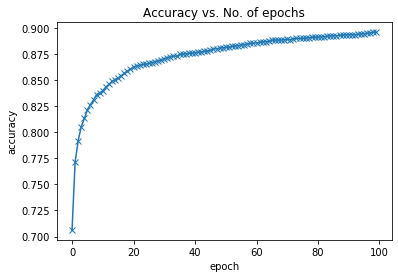

In [84]:
# Replace these values with your results
history = fit(100, 0.001, model, train_loader, val_loader)
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Shape: torch.Size([1, 28, 28])
Label: 7


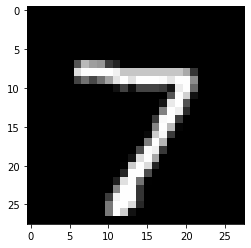

In [88]:
# Define test dataset
test_dataset = MNIST(root='/', 
                     train=False,
                     transform=transforms.ToTensor())

img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Label: 7 , Predicted: 7


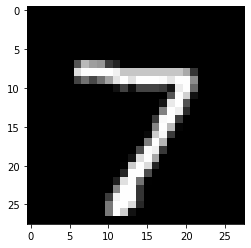

In [89]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

# img.unsqueeze simply adds another dimension at the begining of the 1x28x28 tensor,
# making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))